# Анализ рынка компьютерных игр
<br>Интернет-магазин «Стримчик», продающий по всему миру компьютерные игры, руководствуясь информацией из открытых источников подготовил данные о продажах игр, оценок пользователей и экспертов, жанров и платформ (например, Xbox или PlayStation). 
<br>Для анализа переданы данные до 2016 года. Нужно отработать принцип работы с данными так, чтобы можно было составить прогноз по продажам на любой последующий год, руководствуюясь данными прошлого года.

<br>**Задача - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

<br> *Примечание: В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*

### План проекта
1. Открытие файла с данными и изучение общей информации;
2. Подготовка данных;
<br>- замена названий столбцов
<br>- преобразование данных в нужные типы
<br>- обработка пропусков
3. Исследовательский анализ данных;
4. Составление портрета пользователя каждого региона;
5. Проверка гипотез;
6. Общий вывод.

### Шаг 1. Открытие файлов с данными и изучение общей информации. 

In [84]:
#Прежде всего импортирую нужные библиотеки
import pandas as pd #Импортирую библиотеку pandas
%matplotlib inline
import matplotlib.pyplot as plt #Импортирую библиотеку matplotlib
import seaborn as sns #Импортирую библиотеку seaborn
import numpy as np #Импортирую библиотеку высокоуровневых математических функций numpy
from scipy import stats as st # Из библиотеки scipy импортирую медод stats
import math #Импортирую модуль math

#Читаю файл с данными
games_df = pd.read_csv('/datasets/games.csv') 
#Печатаю первые 5 строк таблицы для ознакомления с данными
display(games_df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Описание  полученных данных
Для обработки и анализа получен датасет, ныне гордо именуемый *games_df*. Он состоит из следующих столбцов:

<br>•	Name — название игры
<br>•	Platform — платформа
<br>•	Year_of_Release — год выпуска
<br>•	Genre — жанр игры
<br>•	NA_sales — продажи в Северной Америке (миллионы проданных копий)
<br>•	EU_sales — продажи в Европе (миллионы проданных копий)
<br>•	JP_sales — продажи в Японии (миллионы проданных копий)
<br>•	Other_sales — продажи в других странах (миллионы проданных копий)
<br>•	Critic_Score — оценка критиков (максимум 100)
<br>•	User_Score — оценка пользователей (максимум 10)
<br>•	Rating — рейтинг от организации ESRB (определяет возрастную категорию игр)

In [85]:
#Получаю информацию по датасету
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Индивидуальное рассмотрение  полученных данных
Индивидуально рассмотрю некоторые столбцы в датасете, а именно: 'Platform', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating'

In [86]:
print('Список игровых платформ')
print(games_df['Platform'].unique()) #Определяю уникальные значения столбца
print('_____________________________________________________________________')
print('Годы релизов игр')
print(sorted(games_df['Year_of_Release'].unique())) #Определяю уникальные значения столбца
print('_____________________________________________________________________')
print('Игровые жанры')
print(games_df['Genre'].unique()) #Определяю уникальные значения столбца
print('_____________________________________________________________________')
print('Оценки критиков')
print(games_df['Critic_Score'].unique()) #Определяю уникальные значения столбца
print('_____________________________________________________________________')
print('Оценки пользователей')
print(games_df['User_Score'].unique()) #Определяю уникальные значения столбца
print('_____________________________________________________________________')
print('Рейтинг игр')
print(games_df['Rating'].unique()) #Определяю уникальные значения столбца

Список игровых платформ
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
_____________________________________________________________________
Годы релизов игр
[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan]
_____________________________________________________________________
Игровые жанры
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
_____________________________________________________________________
Оценки критиков
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74.

### Вывод к Шагу 1

Для проведения исследовательсвокго и статистического анализа предоставлена генеральная совокупностьданных по рынку компьютерных игр выходивших с 1980 по 2016 годы на различных платформах. В датасете 16715 строк с данными, и следующие столбцы:

<br>**Столбец 'Name'**<br>
Содержит названия игр. Тип данных *object*. Содержит 2 пропущенных значения, что составляет 0,012%. Отсутствие этих данных можно смело считать ошибкой возникшей либо в процессе конвертирования, либо по причине других факторов, например: достоверное название игры не сохранилось, название игры было на **другом языке** (предоложем на русском, почему нет... в России тоже был бум разработки компьютерных игр, вспомните хотябы знаменитые квесты про Чапаева или про Братьев Пилотов, а еще были Аллоды, Вагнеры, Космические рейнджеры, Демиурги, Дальнобойщики, Тетрис(!!!) и множество других, некторые из них, издавались за рубежом). Пропущенные значения в этом столбце подлежат удалению.  

<br>**Столбец 'Platform'**<br>
Содержит названия игровых платформ, существовавших в стародавние времена и существующие до сих пор. Тип данных *object*. Пропущенные значения в столбце отсутствуют. Подготовка данных не требуется.

<br>**Столбец 'Year_of_Release'**<br>
Содержит данные по годам выхода игр. Тип данных *float64*. Содержит 269 пропущенных значений, что составляет 1,6%. Отсутствие этих данных также можно считать ошибкой, возникшей либо в процессе конвертирования данных, либо просто потому, то достоверно неизвестен год выхода игры, это может быть характерно для старых игр. Тип данных следует перевести в *datetime*. Пропущенные значения в этом столбце подлежат удалению. 

<br>**Столбец 'Genre'**<br>
Содержит название жанров игр. Тип данных *object*. Также как и столбец 'Name' содержит 2 пропущенных значения, что составляет 0,012%. Отсутствие этих данных можно считать ошибкой возникшей либо в процессе конвертирования, либо по причине других факторов, например: достоверно не известен жанр игры, или жанр игры не определен разработчиком (такое возможно в случае сочетания нескольких жанров в одной игре). Пропущенные значения в этом столбце подлежат удалению. 

<br>**Столбцы 'NA_sales', 'EU_sales', 'JP_sales', 'other_sales'**<br>
Содержат информацию о продаже компьютерных игр, выраженную в миллионах проданных копий для Северной Америки, Европы, Японии и других стран соответственно. Тип данных *float64*. Пропущенные значения в столбце отсутствуют. Подготовка данных не требуется.

<br>**Столбец 'Critic_Score'**<br>
Содержит данные об оценке игр со стороны критиков. Тип данных *float64*. Содержит 8 578 пропущенных значений, что составляет немного, немало 51,3%. Отсутствие этих данных можно считать ошибкой возникшей в процессе конвертирования данных. Хотя с другой стороны, наличите пропущеных значений может быть обусловлено тем, что составление рейтигов компьютерных игр началось с серидины лихих 90-х годов прошлого века. Пропущенные значения в этом столбце не подлежат обработке.

<br>**Столбец 'User_Score'**<br>
Содержит данные об оценке игр со стороны пользователей. Тип данных *object*. Содержит 6 701 пропущенных значений, что составляет 40,1% от общего числа строк. Отсутствие этих данных описывается аналогично столбцу 'Critic_Score'. Тип данных следует заменить на *float64*. Пропущенные значения в этом столбце не подлежат обработке. Дополнительно отмечу, что в этом столбце присутствуют значения 'tbd', что означает *to be determined* и переводится как "будет уточнено". Скорее всего эти данные характерны для недавно вышедших игр, рейтинг среди пользователей которых еще не определен. Действие с этими данным будут понятны в ходе Шага 2, поскольку сперва необходмо определить их количество и уровень значимости.

<br>**Столбец 'Rating'**<br>
Содержит данные о рейтинге игр по возрастам от организации ESRB. Тип данных *object*. Содержит 6 766 пропущенных значений, что составляет 40,4% от общего числа строк. Отсутствие этих данных описывается аналогично столбцам 'Critic_Score' и 'User_Score'. Однако стоит подробнее разобраться с наименованиями рейтингов, поскольку среди них могут оказаться ошибочные или неверные. Пропущенные значения в этом столбце также не подлежат обработке.

<br>**Обобщение**<br>
Рынок компьютерных игр - стремительно развивающийся, подверженный новым трендам и изменениям коньюнктуры. Даже относительно небольшой временной промежуток может кардинально изменить отрасль. Эта идея ляжет в основу текущего проекта. Есть предположение, что для анализа данных нам потребуется лишь небольшой отрезок времени наиболее приближенный к настоящему.

### Шаг 2. Подготовка данных. 

Руководствуясь выводами из Шага 1 провожу подготовку данных.

In [87]:
#Привожу названия столбцов к нижнему регистру
games_df.columns = games_df.columns.str.lower()
games_df.info() #Проверяю результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [88]:
#Анализирую пропуски в столбцах 'name', 'year_of_release' и 'genre'
print('Пропуски в столбце "name"')
display(games_df[games_df['name'].isnull()])

print('Пропуски в столбце "year_of_release"')
display(games_df[games_df['year_of_release'].isnull()])

print('Пропуски в столбце "genre"')
display(games_df[games_df['genre'].isnull()])

Пропуски в столбце "name"


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в столбце "year_of_release"


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в столбце "genre"


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в столбцах name' и 'genre' оказались в одних и тех же 2 строках. Строк с пропусками в столбце 'year_of_release' - 269, что составляет 1,6% от всего датасета. Однако, в названиях некоторых игр имеется указание года - наприер FIFA Soccer 2004, поэтому пропущенный год выпуска для таких игр можно заполнить из их названия.

In [89]:
year_list = [str(i) for i in range(1980, 2017, 1)] #Создаю строковый список годов выпуска игр
int_year_list = [float(i) for i in range(1980, 2017, 1)] #Создаю список годов выпуска игр с типом float

#Объявляю функцию
def find_year(row):
    row['name'] = str(row['name'])
    for year in row['name'].split():
        if row['year_of_release'] not in int_year_list:
            if year in year_list:
                return int(year)
        else:
            return row['year_of_release']
        
games_df['year_of_release'] = games_df.apply(find_year,axis=1) #Применяю функцию

#Проверяю результат работы функции на 183, 377 и 475 строках
display(games_df.loc[183], games_df.loc[377], games_df.loc[475])
#Проверяю получившийся датасет
games_df.info()

name               Madden NFL 2004
platform                       PS2
year_of_release               2004
genre                       Sports
na_sales                      4.26
eu_sales                      0.26
jp_sales                      0.01
other_sales                   0.71
critic_score                    94
user_score                     8.5
rating                           E
Name: 183, dtype: object

name               FIFA Soccer 2004
platform                        PS2
year_of_release                2004
genre                        Sports
na_sales                       0.59
eu_sales                       2.36
jp_sales                       0.04
other_sales                    0.51
critic_score                     84
user_score                      6.4
rating                            E
Name: 377, dtype: object

name               wwe Smackdown vs. Raw 2006
platform                                  PS2
year_of_release                          2006
genre                                Fighting
na_sales                                 1.57
eu_sales                                 1.02
jp_sales                                    0
other_sales                              0.41
critic_score                              NaN
user_score                                NaN
rating                                    NaN
Name: 475, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16461 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Тким образом получилось заполнить 15 пропусков в столбце 'year_of_release'. Оставшиеся пропуски в столбцах 'name', 'year_of_release' и 'genre' удаляю.

In [90]:
#Удаляю строки с пропущенными значениями в столбцах 'name', 'year_of_release', 'genre'
#для оптимизации меющихся данных. Количество удаленных строк не превысит 1,5% от общего количества
games_df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)
games_df = games_df.reset_index(drop=True) #Сбрасываю индексы

Привожу данные к нужным типам.

In [91]:
#Сперва приведу столбец 'year_of_release' к типу int  
games_df['year_of_release'] = games_df['year_of_release'].astype('int')

Отдельно остановлюсь на значениях "tbd" в столбце 'user_score'.
<br>Как было сказано ранее, аббревиатура tbd расшифровывается как "to be determined" и переводится - "будет уточнено". Скорее всего эти данные характерны для недавно вышедших игр, рейтинг которых среди пользователей еще не определен. Заменить эти значения на хоть сколько-нибудь близкие и достоверные достаточно сложно. Начнем с уточнения их количества. 

In [92]:
print('Количество значений "tbd" в столбце user_score:', len(games_df.query('user_score == "tbd"')))
print('Что составляет', round(len(games_df.query('user_score == "tbd"'))/len(games_df)*100),'% от всего датасета')

Количество значений "tbd" в столбце user_score: 2378
Что составляет 14 % от всего датасета


Удалить такое количество данных неправильно, посокльку велик риск потерять информацию по наиболее свежим играм. Следовательно просто заменю их на **NaN**, а затем приведу данные в стобце к типу *float*.

In [93]:
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan) #Заменяю 'tbd' на NaN
games_df['user_score'] = games_df['user_score'].astype('float') #Привожу к типу float

Плюс ко всему штудирование Википедии показало любопытный факт про возрастные рейтинги игр, а именно, рейтинг **"K-A" ("Kids to Adults")** в настоящее время называется **«E» («Everyone»)**. Следовательно необходимо произвести замену данных в столбце 'rating'.

In [94]:
games_df['rating'] = games_df['rating'].replace('K-A', 'E') #Заменяю данные
print('Значения в столбце "Рейтинг игр"')
print(games_df['rating'].unique()) #Проверяю результат
print(games_df['rating'].value_counts())

Значения в столбце "Рейтинг игр"
['E' nan 'M' 'T' 'E10+' 'AO' 'EC' 'RP']
E       3933
T       2905
M       1536
E10+    1394
EC         8
AO         1
RP         1
Name: rating, dtype: int64


Замечу, что в столбце 'rating' есть пропущенные значения, скорее всего они вызваны тем, что рейтинги играм начали присваиваться с середины 1990-х, к тому же ESRB американская ассоциация, а в нашем датасете есть игры японских производителей, что также может быть причиной пропусков.
<br>Тем не менее есть возможность заполнить пропуске в столбце 'rating' модальным значением исходя из жанра игры.

In [95]:
genre_list = games_df['genre'].unique() #Объявлю список жанров игр

genre_rating_dict = {} #Объявлю словрь для сбора данных, ключ - жанр игры, значение - мода по рейтингу
for i in genre_list: #Заполняю словарь циклом
    df = games_df[games_df['genre'] == i]
    mode = df['rating'].mode()
    genre_rating_dict[i]=mode[0]

print(genre_rating_dict) #Взгляд на результат

for i in genre_list: #Циклом заполняю пропуски в столбце 'genre'
    games_df.loc[games_df['genre'] == i, 'rating'] = games_df.loc[games_df['genre'] == i, 'rating'].fillna(genre_rating_dict[i])

games_df.info() #Получаю информацию по датасету
print(games_df['rating'].value_counts()) #И информацию по столбцу 'rating' после заполнения

{'Sports': 'E', 'Platform': 'E', 'Racing': 'E', 'Role-Playing': 'T', 'Puzzle': 'E', 'Misc': 'E', 'Shooter': 'M', 'Simulation': 'E', 'Action': 'T', 'Fighting': 'T', 'Adventure': 'E', 'Strategy': 'T'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 11 columns):
name               16459 non-null object
platform           16459 non-null object
year_of_release    16459 non-null int64
genre              16459 non-null object
na_sales           16459 non-null float64
eu_sales           16459 non-null float64
jp_sales           16459 non-null float64
other_sales        16459 non-null float64
critic_score       7994 non-null float64
user_score         7472 non-null float64
rating             16459 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
E       7695
T       5524
M       1836
E10+    1394
EC         8
AO         1
RP         1
Name: rating, dtype: int64


Добавляю столбец с важной метрикой - суммарные продажи игр по регионам.

In [96]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
#Для удобства меняю порядок столбцов
games_df = games_df[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'critic_score','user_score','rating']]

In [97]:
#Проверяю результат работы
games_df.info()
display(games_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 12 columns):
name               16459 non-null object
platform           16459 non-null object
year_of_release    16459 non-null int64
genre              16459 non-null object
na_sales           16459 non-null float64
eu_sales           16459 non-null float64
jp_sales           16459 non-null float64
other_sales        16459 non-null float64
total_sales        16459 non-null float64
critic_score       7994 non-null float64
user_score         7472 non-null float64
rating             16459 non-null object
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,T
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,M


### Вывод к Шагу 2

На этом этапе проведена подготовка данных и дополнительно углубленное изучение датасета с изменением типов данных, их заменой и добавлением нужных метрик. Далее обо всем по порядку.

В первую очередедь, названия столбцов приведены к нижнему регистру, это сделано для оптимизации дальнейшего процесса анализа и уменьшения количества ошибок.

Пропуски в столбце 'year_of_release' частично заполнены данными, взятыми из названия игр, данные приведены к типу *int*, поскольу так в дальнейшем будет удобнее проводить анализ.

Удалены строки с пропущенными значениями в столбцах 'name', 'year_of_release', 'genre'. Объем удаленных данных не превысил 1,5%, зато в результате мы получили датасет без пропущенных значений в этих столбах, что в дальнейшем также упростит анализ и визуализацию, плюс ко всему поможет избежать ошибок при выполнении кода. Пропущенные значения в этих столбцах могут возникнуть по следующим причинам:
1. Ошибки возникшее в процессе конвертирования баз данных;
2. Достоверное название игры не сохранилось из-за того, что игра вышла достаточно давно, или же название изначально было на другом языке;
3. Достоверно неизвестен год выхода игры - это также может быть характерно для "старых" игр;
4. Достоверно не известен жанр игры (игры вышедшие давно), или жанр игры не определен разработчиком (такое возможно в случае сочетания нескольких жанров в одной игре).
Стоит отметить, что этот датасет можно было вернуть на доработку, чтобы составители смогли достоверно заполнить пропуски в этих столбцах.

Далее были обработаны значения **"tbd"** в столбце 'user_score'. Аббревиатура tbd расшифровывается как "to be determined" и переводится - "будет уточнено". Скорее всего эти данные характерны для недавно вышедших игр, рейтинг которых среди пользователей еще не определен. Заменить эти значения на хоть сколько-нибудь близкие и достоверные достаточно сложно, а их удаление привело бы к потере 14% датасета, в связи с чем было принято решение о их замене на *NaN*. В последствии, оставшиеся в этом столбце данные были приведены к типу *float64*. Это было сделано для того, чтобы в дальнейшем можно было без проблем производить арифметические операции с данными из этого столбца.

Дополнительно произведена замена значений **"K-A" ("Kids to Adults")** на  **«E» («Everyone»)** в столбце 'rating', посокльку фактически это одно и то же наименование, ктоторое было изменено в 1998 г.

Отдельно отмечу, что пропуски в столбцах 'critic_score', 'user_score', 'rating' я решил оставить без заполнения, поскольку нет возможности сделать это достоверно, или же близко к истине. Есть предположение о том, что игры получают оценки независимо от рейтинга, жанра или любого другого показателя, более того, зачастую оценки критиков и пользователей могут быть диаметрально противоположными.

### Шаг 3. Исследовательский анализ данных.

Определю количество выпущенных игр по годам.

Количество игр выпущенных в период с 1980 по 2016 гг.
2008    1429
2009    1426
2010    1255
2007    1198
2011    1137
2006    1008
2005     941
2002     830
2003     779
2004     764
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64


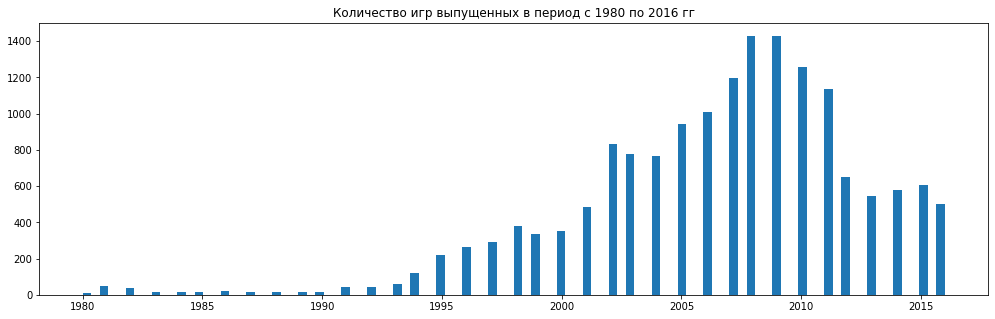

In [98]:
print('Количество игр выпущенных в период с 1980 по 2016 гг.')
print(games_df['year_of_release'].value_counts()) # применяю метод .value_counts() для посчета
#для наглядности построю график
fig, (ax1) = plt.subplots(
    nrows=1, ncols=1,
    figsize=(17, 5)
)
 
ax1.hist(
    games_df['year_of_release'], bins=100,
) 

ax1.set_title('Количество игр выпущенных в период с 1980 по 2016 гг')
ax1.yaxis.tick_left()


plt.show()

### Промежуточный вывод 1
Полученный график наглядно демонстрирует развитие рынка компьютерных игр. Опишу подробнее.
<br>**1980 - 1993 гг.** период зарождения рынка. Разработчики пробуют себя в новом деле, появляются первые ПК и  консольные игры. Процесс идет медленно, в первую очередь в связи с неповсеместным распростронением ПК и консолей + низкая производительность "железа" + зарождающийся рынок сбыта.
<br>**1994 - 2008 гг.** период бума компьютерных игр, вызванный экспоненциальным ростом производительонсти ПК и консолей, огромным спросом на игры, небывалым притоком инвестиций в отрасль. Для этого этапа характерны - небывалое число платформ, и жесточайшая конкуренция на рынке.
<br>**2009 - 2012 гг.** период стабилизации рынка характерен сокращением числа издателей игр и консолей, не выдержавших конкуренции. Пользователи становятся более избирательными. Заканчивается передел рынка
<br>**2012 - 2016 гг.** стагнация первоначального рынка. Темп технологического развития несколько снижен, рынок поделен среди крупных игроков. Окончательно канули в лету многие издатели и платформы. Развитие онлайн-игр уводит пользователей от разовой покупки в сторону микротранзакций.
<br>**Для дальнейшего анализа наибольший интерес представляет период 2012 - 2016 гг.**

,platform,total_sales
0,PS2,1247.28
1,X360,961.30
2,PS3,931.34
3,Wii,891.18
4,DS,802.79
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.54
9,3DS,257.81


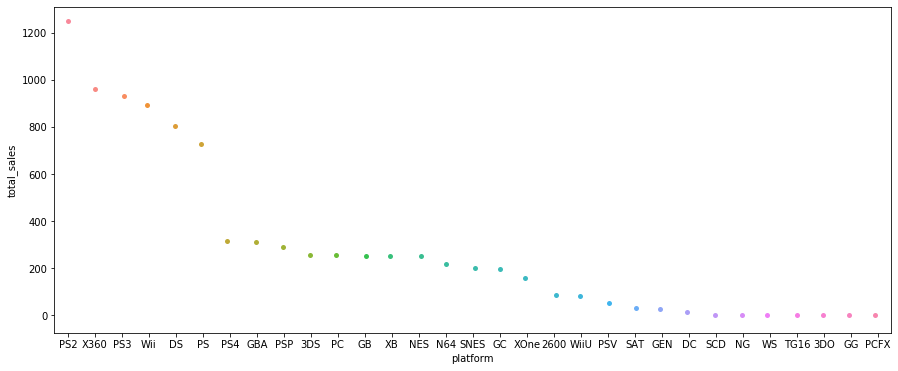

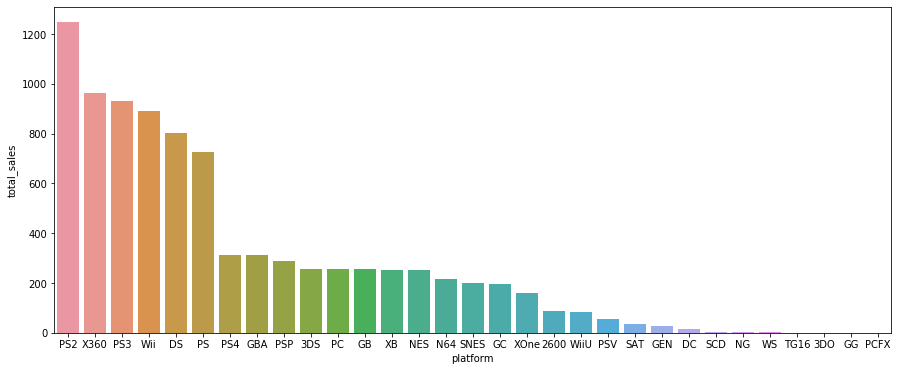

In [99]:
#Создаю таблицу по суммарным продажам по платформам
platform_df = games_df[['platform'] + ['total_sales']]
platform_df = (platform_df
    .groupby('platform')
    .sum()
    .sort_values(by = 'total_sales', ascending=False)
    .reset_index(level='platform')
)
    
display(platform_df.head(10))
#Для наглядности строю график
plt.figure(figsize=(15, 6))
sns.stripplot(x="platform", y="total_sales", data=platform_df)
plt.figure(figsize=(15, 6))
sns.barplot(x='platform', y='total_sales', data=platform_df)

Среди всего перечня платформ можно выделить ряд лидеров по продажам, а именно:
1. PS2 - 1233.56 млн. проданых копий игр
2. X360 - 961.24 млн. проданых копий игр
3. PS3 - 931.34 млн. проданых копий игр
4. Wii - 891.18 млн. проданых копий игр
5. DS - 802.78 млн. проданых копий игр
6. PS - 727.58 млн. проданых копий игр

In [100]:
#Рассчитываю время жизни каждой платформы
platform_list = games_df['platform'].unique() #Получаю перечень платформ

length = [] #Объявляю список, куда будут сложены сроки жизни
for plat in platform_list: #расчет выполняю в цикле
    df = games_df[games_df['platform'] == plat]
    start = min(df['year_of_release'])
    stop = max(df['year_of_release'])
    live = stop - start
    length.append(live)
    if live > 4 or live == 0:
        print('Время жизни', plat, 'равно', live, 'лет')
    else:
        print('Время жизни', plat, 'равно', live, 'года')

Время жизни Wii равно 10 лет
Время жизни NES равно 11 лет
Время жизни GB равно 13 лет
Время жизни DS равно 28 лет
Время жизни X360 равно 11 лет
Время жизни PS3 равно 10 лет
Время жизни PS2 равно 11 лет
Время жизни SNES равно 9 лет
Время жизни GBA равно 7 лет
Время жизни PS4 равно 3 года
Время жизни 3DS равно 5 лет
Время жизни N64 равно 6 лет
Время жизни PS равно 9 лет
Время жизни XB равно 8 лет
Время жизни PC равно 31 лет
Время жизни 2600 равно 9 лет
Время жизни PSP равно 11 лет
Время жизни XOne равно 3 года
Время жизни WiiU равно 4 года
Время жизни GC равно 6 лет
Время жизни GEN равно 4 года
Время жизни DC равно 10 лет
Время жизни PSV равно 5 лет
Время жизни SAT равно 5 лет
Время жизни SCD равно 1 года
Время жизни WS равно 2 года
Время жизни NG равно 3 года
Время жизни TG16 равно 0 лет
Время жизни 3DO равно 1 года
Время жизни GG равно 0 лет
Время жизни PCFX равно 0 лет


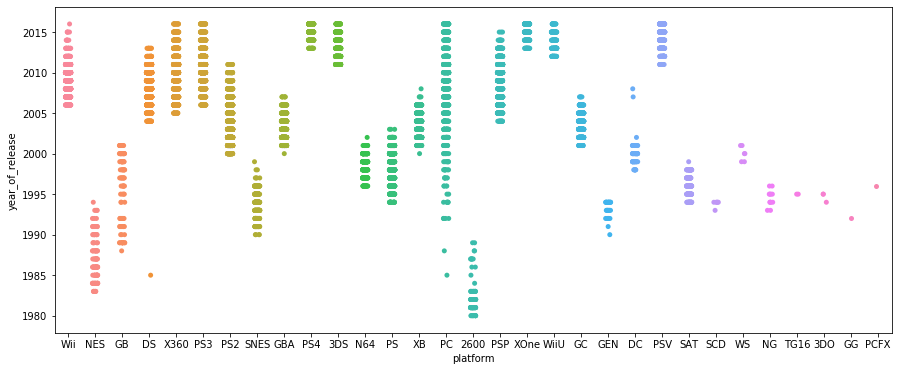

In [101]:
#Строю график породолжительности жизни каждой платформы
plt.figure(figsize=(15, 6))
sns.stripplot(x="platform", y="year_of_release", data=games_df)

Из расчета и графика видно, что подавляющее большинство платформ имеют значительный срок жизни. Однако, есть ряд платформ, срок жизни которых составляет менее 1 года, например TG16, GG, PCFX. Срок жизни таких платформ можно назвать выбросом и не брать во внимание для расчета среднего срока жизни платформы. 

In [102]:
#Удаляю из списка платформы со временем жизни меньшим 1 года
length = [x for x in length if x > 0]
print(length)

[10, 11, 13, 28, 11, 10, 11, 9, 7, 3, 5, 6, 9, 8, 31, 9, 11, 3, 4, 6, 4, 10, 5, 5, 1, 2, 3, 1]


In [103]:
print('Средний срок жизни платформы составляет', round(sum(length)/len(length)), 'лет')

Средний срок жизни платформы составляет 8 лет


### Промежуточный вывод 2
Среди всего перечня платформ можно выявлен ряд лидеров по продажам, а именно: PS2, X360, PS3, Wii, DS, PS.
<br> Получен график распределения продаж по годам, который наглядно демонстрирует срок жизни каждой игровой платформы. Исходя из графика, он составляет в среднем **8 лет**.
<br>**Поправка к промежуточному выводу 1** - для дальнейшей работы примем актуальный период **2014 - 2016 гг.** поскольку тут явно видны действующие производители игр, а консоли прошлых поколений, такие как PS2 ушли с рынка.

In [104]:
#Определяю новый датасет для дальнейшего анализа
actual_df = games_df.query('year_of_release >= 2014')
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16458
Data columns (total 12 columns):
name               1689 non-null object
platform           1689 non-null object
year_of_release    1689 non-null int64
genre              1689 non-null object
na_sales           1689 non-null float64
eu_sales           1689 non-null float64
jp_sales           1689 non-null float64
other_sales        1689 non-null float64
total_sales        1689 non-null float64
critic_score       718 non-null float64
user_score         888 non-null float64
rating             1689 non-null object
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


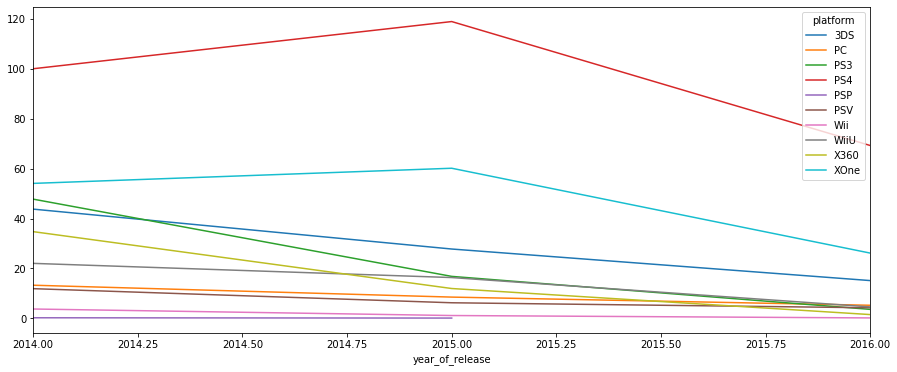

In [105]:
#Создаю промежуточный датасет
sales_df = actual_df[['platform'] + ['year_of_release']  + ['total_sales']]
#Строю сводную таблицу
sales_df = actual_df.pivot_table(index = 'year_of_release', columns='platform', values = 'total_sales', aggfunc = 'sum')

display(sales_df.head(30))
#Печатаю график
sales_df.plot(figsize=(15, 6))

### Промежуточный вывод 3
<br>На полученном срезе датасета представлены следующие игровые платформы: 3DS, PC, PS3, PS4, PSP, PSV, Wii, WiiU, X360, XOne.
<br>Наиболее заметен факт того, что по итогам 2015 года с рынка ушла консоль **PSP**, показывающая минимальный уровень продаж.
<br>Также на графике видно общее снижение продаж по всем платформам.
<br>Среди лидеров рынка по продажам можно выделить **PS4**, **XboxOne**, **3DS**, **PC**.

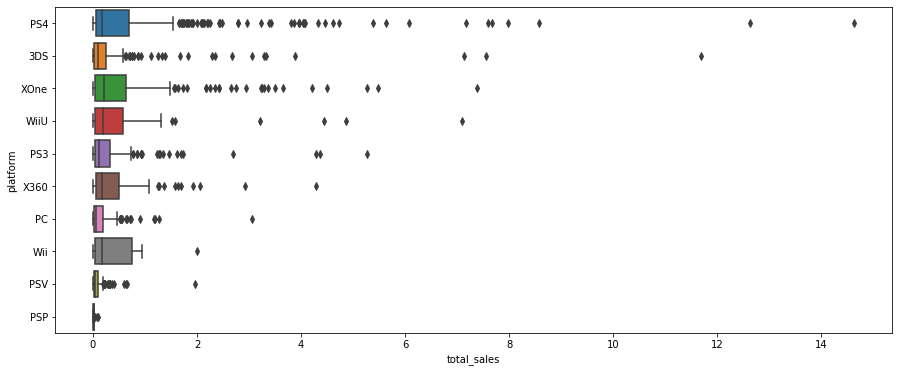

In [106]:
#Строю диаграмму размаха (aka "Ящик с усами") по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(15, 6))
sns.boxplot(y="platform", x="total_sales", data=actual_df, orient="h")

### Промежуточный вывод 4
<br>Построенные диаграммы размаха наглядно показывают то, какой уровень продаж характерен для игр на каждой из платформ. 
<br>Можно выделить характерные общие признаки для 6 из них, а именно **PS4, XOne, WiiU, PS3, X360, Wii** - подавляющее большинство игр (между первым и третьим квартилями) продаются в количестве до миллиона копий, медиана при этом находится на уровне близком к 200 тысячам. При этом у каждого из лидеров имеются отдельные игры проданные большими тиражами, например, на PS4 есть игра, глобальные продажи которой превысили 14 млн. копий (это наиболее высокий показатель). Такие значения количества продаж характерны в основном для ААА-игр с большими бюджетами на разработку и рекламу. Следовательно, перечисленные лидеры рынка явно имеют возможности для выделения большого объема инвестиций на развитие перспективных проктов.
<br>В то же время явно видны аутсайдеры рынка, это две портативные консоли - PSP, и пришедшая ей на замену PSV. Здесь низкие объемы продаж вызваны тем, что это фактически одна и та же, причем очень нишевая платформа, рассчитанная на конкретного потребителя. Также напомню, что  2015 года прекращен выпуск игра для PSP.

Кореляция между отзывами и продажами для игр на консоли PS4
              total_sales  critic_score  user_score
total_sales      1.000000      0.402661   -0.040132
critic_score     0.402661      1.000000    0.546434
user_score      -0.040132      0.546434    1.000000


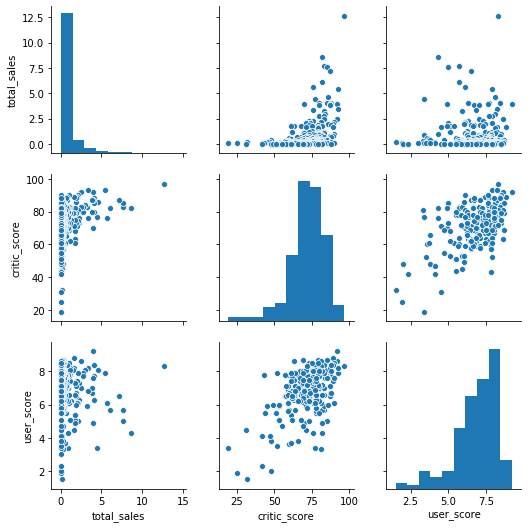

In [107]:
#Для определения кореляции между отзывами и продажами выбрана консоль PS4
ps4_df = actual_df.query('platform == "PS4"')
score = ['total_sales', 'critic_score', 'user_score']
sns_plot = sns.pairplot(ps4_df[score]) #Строю матрицу с диаграммами рассеяния
print('Кореляция между отзывами и продажами для игр на консоли PS4')
print(ps4_df[score].corr())

### Промежуточный вывод 5
<br>Построенные диаграммы рассеяния и рассчитанная корреляция между отзывами и глобальными продажами дали очень любопытные результаты. 
<br>Оказалось, что для **PS4** характерно отсутствие корреляции между *отзывами пользователей* и *уровнем продаж*, и в то же время имеется средняя прямая корреляция между *отзывами критиков* и *уровнем продаж*. Следовательно покупатели прислушиваются к мнению критиков, а вот к отзывам пользователей абсолютно равнодушны. При этом отзывы пользователй и отзывы критиков имеют среднюю прямую корреляцию между собой.

In [108]:
#Соотношу выводы о зависимости между отзывами и продажами на консоли PS4 с выводами по другим платформам
actual_platform_list = actual_df['platform'].unique() #Список актуальных платформ

#Циклом считаю корреляцию
for i in actual_platform_list:
    df = games_df[games_df['platform'] == i]
    print('Кореляция между отзывами и продажами для игр на консоли', i)
    display(df[score].corr())

Кореляция между отзывами и продажами для игр на консоли PS4


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Кореляция между отзывами и продажами для игр на консоли 3DS


,total_sales,critic_score,user_score
total_sales,1.000000,0.348740,0.222078
critic_score,0.348740,1.000000,0.745222
user_score,0.222078,0.745222,1.000000


Кореляция между отзывами и продажами для игр на консоли XOne


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


Кореляция между отзывами и продажами для игр на консоли WiiU


,total_sales,critic_score,user_score
total_sales,1.000000,0.34838,0.400219
critic_score,0.348380,1.00000,0.770080
user_score,0.400219,0.77008,1.000000


Кореляция между отзывами и продажами для игр на консоли PS3


,total_sales,critic_score,user_score
total_sales,1.000000,0.432759,0.128416
critic_score,0.432759,1.000000,0.631154
user_score,0.128416,0.631154,1.000000


Кореляция между отзывами и продажами для игр на консоли X360


,total_sales,critic_score,user_score
total_sales,1.000000,0.393150,0.113813
critic_score,0.393150,1.000000,0.622999
user_score,0.113813,0.622999,1.000000


Кореляция между отзывами и продажами для игр на консоли PC


,total_sales,critic_score,user_score
total_sales,1.000000,0.257395,0.012905
critic_score,0.257395,1.000000,0.555199
user_score,0.012905,0.555199,1.000000


Кореляция между отзывами и продажами для игр на консоли Wii


,total_sales,critic_score,user_score
total_sales,1.000000,0.177907,0.112831
critic_score,0.177907,1.000000,0.688285
user_score,0.112831,0.688285,1.000000


Кореляция между отзывами и продажами для игр на консоли PSV


,total_sales,critic_score,user_score
total_sales,1.000000,0.131763,0.013489
critic_score,0.131763,1.000000,0.734300
user_score,0.013489,0.734300,1.000000


Кореляция между отзывами и продажами для игр на консоли PSP


,total_sales,critic_score,user_score
total_sales,1.000000,0.318593,0.220890
critic_score,0.318593,1.000000,0.526694
user_score,0.220890,0.526694,1.000000


### Промежуточный вывод 6
<br>Данные по корреляции между отзывами и продажами, полученные для платфоы **PS4** релевантны с аналогичными результатами для платфом **PS3, X360, XOne**. 
<br>Для платформы **PC** корреляция между отзывами критиков и продажами низкая, между отзывами пользователей и продажами отсутствует.
<br>Для платформ **PSP**, **3DS** и **Wii** характерна низкая прямая корреляция как между отзывами пользователей и продажами так и между отзывами критиков и продажами.
<br>**На данном этапе можно сделать следующий вывод:**
<br>Однозначно нельзя сказать, что отзывы критиков или пользователей сильно влияют на уровень продаж, но в то же время тенденция к корреляции наблюдается у явных лидеров рынка, таких как **PS4** и **XOne**. Этот факт можно связать с тем, что данные платформы активно рекламируют свои продукты в силу бюджетных возможностей, а это в свою очередь влечет повышенный инетерес со стороны пользователей и критиков, следовательно повышается возможность сбора большего количества отзывов, по сравнению с конкурентами. А факт того, что продажи игр не зависят от пользовтельских оценок, интерпретируется следующим образом - публика привыкла доверять авторитетным мнениям.

Количество игр по жанрам
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64


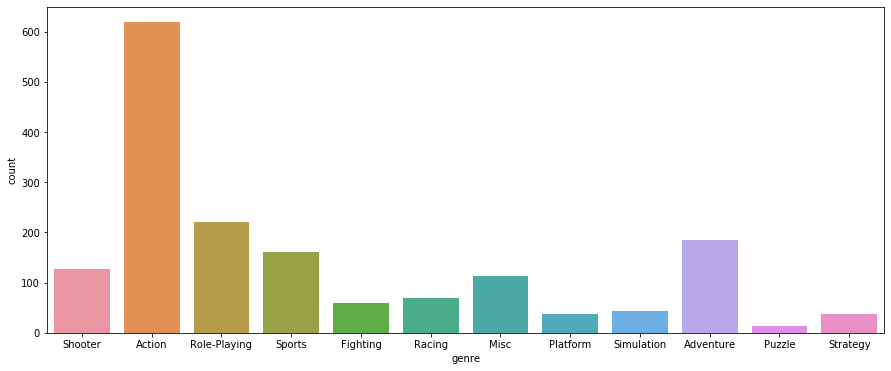

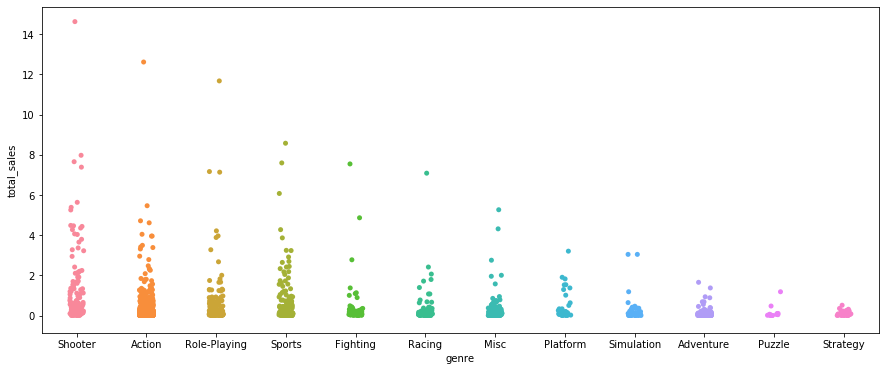

In [109]:
#Нахожу распределение игр по жанрам
print('Количество игр по жанрам')
actual_genre = actual_df['genre'].value_counts()
print(actual_genre.head(12)) #Применяю метод .value_counts() для посчета


#Для наглядности строю график по количеству проданных игр
plt.figure(figsize=(15, 6))
sns.countplot(x='genre', data=actual_df)

#...и график по распределению продаж
plt.figure(figsize=(15, 6))
sns.stripplot(x="genre", y="total_sales", data=actual_df)

Теперь определим уровни продаж по каждому жанру

,genre,total_sales
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


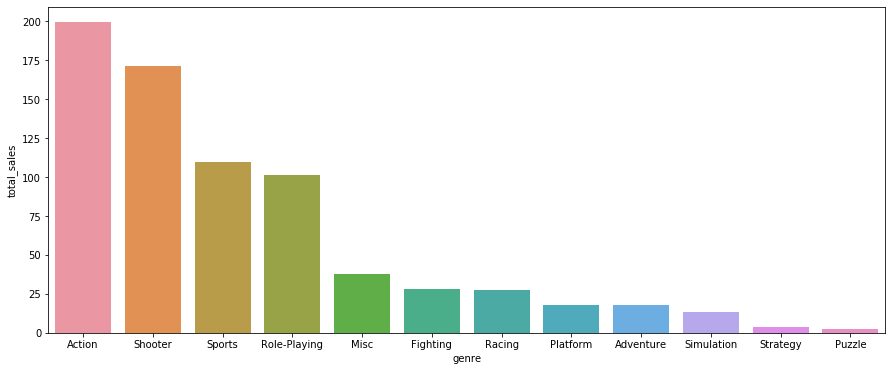

In [110]:
#Создаю таблицу по суммарным продажам по платформам
genre_df = actual_df[['genre'] + ['total_sales']]
genre_df = (genre_df
    .groupby('genre')
    .sum()
    .sort_values(by = 'total_sales', ascending=False)
    .reset_index(level='genre')
)
    
display(genre_df.head(12))
#Для наглядности строю график
plt.figure(figsize=(15, 6))
sns.barplot(x='genre', y='total_sales', data=genre_df)

Из полученной таблицы и графика явно видно, что больше всего продается игр в стиле Action, затем Shooter, Sports, Role-Playing и т.д. Наименьшее количество продаж при этом приходится на следующие жанры: Simulation, Strategy, Puzzle.
<br>Однако и выпускается игр жанров Action значительно больше, чем, предположим тех же Strategy или Puzzle. На мой взгляд стоит ввести метрику по удельным продажам - сколько продаж приходится на 1 игру каждого жанра. Попробуем это сделать.

In [111]:
#genre_df = pd.concat([genre_df, actual_genre])
actual_genre = actual_df.pivot_table(index='genre', values='total_sales', aggfunc = 'count')
genre_df=genre_df.merge(actual_genre, on='genre')
new_names = ['genre', 'total_sales', 'games_sold']
genre_df.set_axis(new_names, axis = 'columns', inplace = True)

display(genre_df.head(12))

,genre,total_sales,games_sold
0,Action,199.36,619
1,Shooter,170.94,128
2,Sports,109.48,161
3,Role-Playing,101.44,221
4,Misc,37.55,113
5,Fighting,28.22,60
6,Racing,27.52,69
7,Platform,18.09,38
8,Adventure,17.55,185
9,Simulation,13.13,44


,genre,total_sales,games_sold,sold_per_game
0,Action,199.36,619,0.322068
1,Shooter,170.94,128,1.335469
2,Sports,109.48,161,0.680000
3,Role-Playing,101.44,221,0.459005
4,Misc,37.55,113,0.332301
5,Fighting,28.22,60,0.470333
6,Racing,27.52,69,0.398841
7,Platform,18.09,38,0.476053
8,Adventure,17.55,185,0.094865
9,Simulation,13.13,44,0.298409


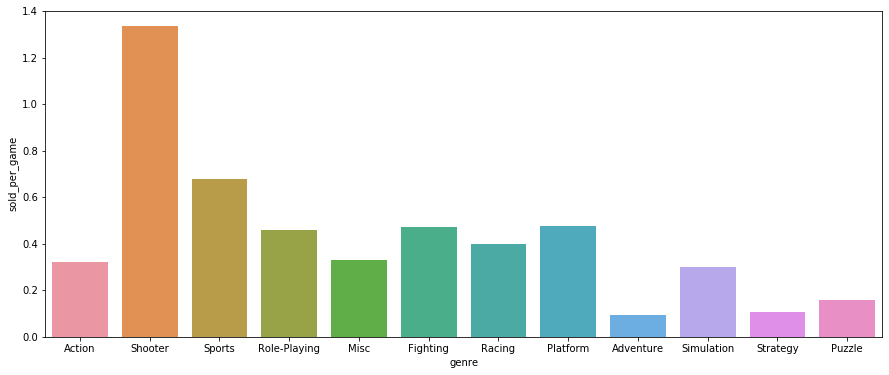

In [114]:
genre_df['sold_per_game'] = genre_df['total_sales']/genre_df['games_sold'] 
display(genre_df.head(12))

#Для наглядности строю график
plt.figure(figsize=(15, 6))
sns.barplot(x='genre', y='sold_per_game', data=genre_df)

### Промежуточный вывод 7
<br>Анализ абсолютных и удельных показателй продаж по играм различных жанров позволил сделать следующие выводы:
1. По абсолютным показателям продаж явно лидируют жанры: Action, Shooter, Sports, Role-Playing. Наименее востребованы Simulation, Strategy, Puzzle.
2. По удельным показателям  лидеры остались те же, однако, в топе здесь Shooter, а жанр Action вытеснен жанром Fighting. Список наименее прибыльных жанров следующий -  Puzzle, Strategy, Adventure.

### Вывод к Шагу 3

Анализируя пролученные в этом шаге результаты можно сделать ряд важных выводов.
<br>В первую очередь, стоит отметить, что рынок компьютерных игр достаточно "молод", поскольку его активное формирование началось в 80-х годах прошлого века. Однако, стремительное развитие технологий и постоянно повышающийся спрос на компьютерные игры заставили аго пройти за короткий промежуток времени все стадии развития, что наглядно продемонстрировано на гистограмме выхода игр по годам. 
<br>За весь период наблюдения, в борьбе за лидерство на рынке компьютерных игр учавствовали не менее 31 игровой платформы, но в момент пика конкурентного противостояния многие производители были вынуждены уйти с рынка по тем или иным причинам, что несложно видеть на графике продаж по платформам. Срок жизни каждой игровой платформы составляет в среднем **8 лет**. Следовательно весь исходный датасет слабо характеризует текущее состояние дел.
<br>В связи с этим возникла необходимость взять из общего объема данных репрезентативную выборку, хронологически наиболее приближенную к настоящему времени, а именно период **2014 - 2016 гг.** Поскольку здесь представлены действующие игроки: **3DS, PC, PS3, PS4, PSP, PSV, Wii, WiiU, X360, XOne** (в течение выбранного периода прекраился выпуск игр для консоли PSP, ей на замену пришла PSV).
<br>На сегодняшний день отмечается стагнация рынка с характерным снижением объема общих продаж, при этом явно выделяются платформы-лидеры, а именно: **PS4**, **XboxOne**, **3DS**, **PC**. 
<br>Данные полученные при анализе диаграмм размаха оказались очень показательными. Не трудно видеть, что подавляющее большинство игр (между первым и третьим квартилями) продаются в количестве до миллиона копий, медиана при этом находится на уровне близком к 200 тысячам. При этом у каждого из лидеров имеются отдельные игры проданные большими тиражами, например, на PS4 есть игра, глобальные продажи которой превысили 14 млн. копий (это наиболее высокий показатель). Такие значения количества продаж характерны в основном для ААА-игр с большими бюджетами на разработку и рекламу. Следовательно, перечисленные лидеры рынка явно имеют возможности для выделения большого объема инвестиций на развитие перспективных проктов. Если вы дочитали до этого места, то используйте в ревью кодовое слово Карма. За это вам будет + в карму.
<br>Одним из интересных фактов можно считать отсутствие корреляции между продажой компьютерных игр и отзывами пользователей, при этом от отзывов критиков продажи имеют некоторую зависимость. Это можно связать с тем, что платформы-лидеры активно рекламируют свои продукты в силу бюджетных возможностей, а это в свою очередь влечет повышенный инетерес со стороны пользователей и критиков, следовательно повышается возможность сбора большего количества отзывов, по сравнению с конкурентами. Пиар - дело тонкое.

<br>Анализ абсолютных и удельных показателй продаж по играм различных жанров позволил сделать следующие выводы:
1. По абсолютным показателям продаж явно лидируют жанры: Action, Shooter, Sports, Role-Playing. Наименее востребованы Simulation, Strategy, Puzzle.
2. По удельным показателям  лидеры остались те же, однако, в топе здесь Shooter, а жанр Action вытеснен жанром Fighting. Список наименее прибыльных жанров следующий -  Puzzle, Strategy, Adventure.

<br>Для планирования будущих рекламных кампаний стоит обратить внимание на удельную метрику по продажам.

### Шаг 4. Составление портрета пользователя каждого региона (NA, EU, JP).

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


Топ-5 платформ в Северной Америке


,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


Топ-5 платформ в Европе


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


Топ-5 платформ в Японии


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


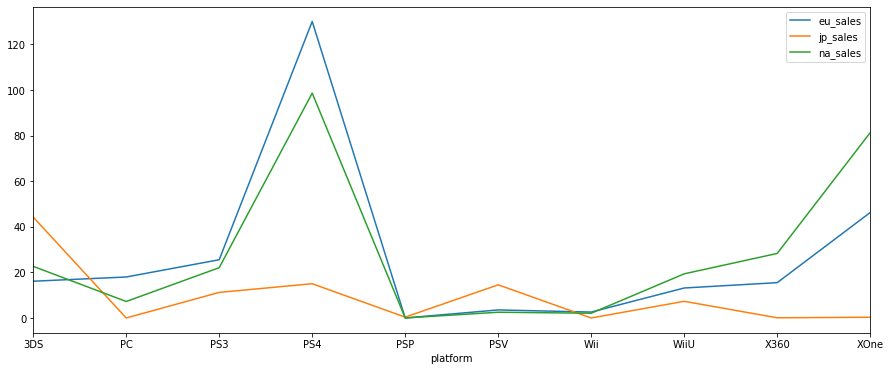

In [115]:
regional_platform = actual_df.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum') 
display(regional_platform)

print('Топ-5 платформ в Северной Америке')
display(regional_platform.sort_values(by=['na_sales'], ascending=False).drop(['eu_sales', 'jp_sales'], axis=1).head(5))

print('Топ-5 платформ в Европе')
display(regional_platform.sort_values(by=['eu_sales'], ascending=False).drop(['na_sales', 'jp_sales'], axis=1).head(5))

print('Топ-5 платформ в Японии')
display(regional_platform.sort_values(by=['jp_sales'], ascending=False).drop(['eu_sales', 'na_sales'], axis=1).head(5))

#Печатаю график
regional_platform.plot(figsize=(15, 6))

### Промежуточный вывод 1
В этом месте я подробно остановлюсь на различиях в спросе на игры определенных пллатформ в разных регионах. Здесь явно можно выделить характерные особенности.
<br> Для пользователей Северной Америки картина выглядит следующим образом:
1. PS4 - наиболее новая консоль от лидеров рынка с большим количеством эксклюзивных игр ААА уровня. Эта консоль зарекомендовала себя за более чем 20 летнюю историю продаж (если считать от первой PS). Имеет множество поклонников по всему миру
2. XOne - также новинка от Microsoft не уступающая по качесту и характеристикам PS4, при этом имеет незначительное отставание от лидера в этом регионе. Характерно, что регион продаж совпадает с регионом-производиетелм этой консоли.
3. X360 - предыдущая консоль от Microsoft, отходящая на второй план, имеющая весомое отставание от лидеров.
4. 3DS - единственная в перечне портативная консоль, нишевый продукт с определенными потребителями.
5. PS3 - предыдущая консоль от Sony, также постепенно уходящая с рынка, в связи обновлением в линейке.

<br> Для пользователей из Европы характерно следующее распределение:
1. PS4 - популярность этой консоли в Европе объясняется аналогично с Северной Америкой.
2. XOne - новинка от Microsoft не уступающая по качесту и характеристикам PS4. В Европе отставание от PS4 сильнее чем в Северной Америке, вероятно, в связи с тем, что Microsoft выбрала своей целевой аудиторией жителей Северной Америки
3. PS3 - предыдущая консоль от Sony, постепенно уходящая с рынка, в связи обновлением в линейке.
4. PC - присутствие платформы ПК в Топ-5 по продажам в Европе вызвано исторически-сложившейся привычкой, количество проданных игр для ПК значительно меньше, чем для консолей.
5. 3DS - единственная в перечне портативная консоль, нишевый продукт с определенными потребителями.

<br> Япония - загадочный регион, однако, они чрезвычайно любят все свое! Топ-5 игровых платформ этому подтверждение - все консоли исключительно японские, Xbox далеко позади.
1. 3DS - первое место по праву занимает портативная консоль. Здесь немаловажную роль играет особенность японского менталитета и образа жизни, для них портативность консоли намного важнее графической составляющей.
2. PS4 - топовая "родная" консоль от Sony. Выбор очевиден.
3. PSV - третье место незначительно отстает от второго места, поскольку также пользуется популярностью из-за своей портативности.
4. PS3 - предыдущая консоль от Sony, постепенно уходящая с рынка, в связи обновлением в линейке.
5. WiiU - уникальная консоль от Nintendo сочетающая в себе возможности портативности и подключения к ТВ Занимает почетное пятое место в связи с небольшим количеством игр.

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


Топ-5 жанров в Северной Америке


,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


Топ-5 жанров в Европе


,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


Топ-5 жанров в Японии


,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


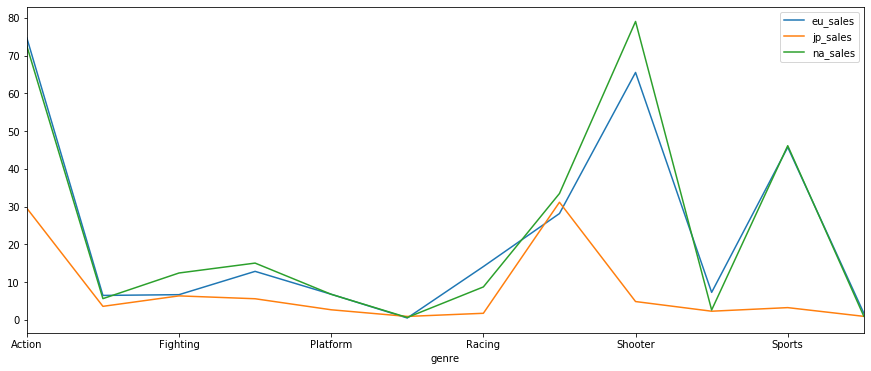

In [116]:
regional_genre = actual_df.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum') 
# index=None, columns=, 
display(regional_genre)

print('Топ-5 жанров в Северной Америке')
display(regional_genre.sort_values(by=['na_sales'], ascending=False).drop(['eu_sales', 'jp_sales'], axis=1).head(5))

print('Топ-5 жанров в Европе')
display(regional_genre.sort_values(by=['eu_sales'], ascending=False).drop(['na_sales', 'jp_sales'], axis=1).head(5))

print('Топ-5 жанров в Японии')
display(regional_genre.sort_values(by=['jp_sales'], ascending=False).drop(['eu_sales', 'na_sales'], axis=1).head(5))


#Печатаю график
regional_genre.plot(figsize=(15, 6))

### Промежуточный вывод 2
В Северной Америке и Европе наиболее полпулярны игровые жанры Shooter, Action, Sports. Связано это с тем, что игры этих жанров наиболее зрелищны и вызывают эмоциональное напряжение, а поскольку в этих регионах преобладают консоли, подключаемые к ТВ, то пользователи выбирают захватывающие игры с хорошей графикой.
<br>В Японии превалируют продажи игр жанров Role-Playing и Action. Здесь это обусловлено прежде всего спросом самих пользователей и тем, что для популярных в Японии консолей выходят по большей части игы этих жанров.

,eu_sales,jp_sales,na_sales
rating,,,
E,74.44,19.47,62.19
E10+,26.16,4.46,33.23
M,109.53,8.71,115.23
T,60.55,60.45,73.41


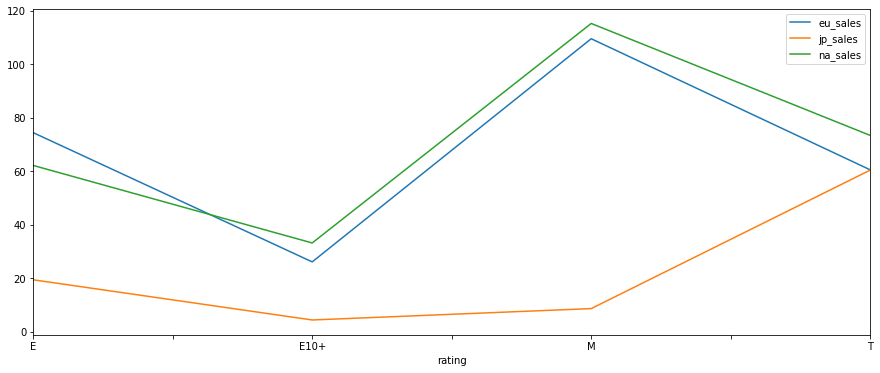

In [117]:
regional_rating = actual_df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum') 
display(regional_rating)

#Печатаю график
regional_rating.plot(figsize=(15, 6))

### Промежуточный вывод 3
В Северной Америке так же как и в Европе наибольшей популярность пользуются игры возрастного рейтинга "М" ("Mature") — "Для взрослых",  и "E" ("Everyone") — "Для всех". А раз эти показатели являются одинковыми для двух регионов, то можно сказать, что рейтинг игры влияет на ее продажи.
<br>На рынке Японии наиболее популярны игры "T" ("Teen") — "Подросткам" и "E" ("Everyone").

### Вывод к Шагу 4

Руководствуясь данными из шага 4 можно попробовать составить типичный портрет для пользователя определенного региона:
<br>Северная Америка - пользователь PS4, играющий в шутер с рейтингом "М".
<br>Европа - пользователь PS4, играющий в экшн с рейтингом "М".
<br>Япония - пользователь 3DS, играющий в ролевые игры с рейтингом "Т".

Это чрезвычайно полезная информация для планирования рекламных кампаний в будущем.

### Шаг 5. Проверка гипотез.

На этом шаге необходимо проверить две гипотезы:</br>
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

#### Задача 1
<br>Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<br>Формулирую нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**.
<br>Формулирую альтернативную гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC **не одинаковые**.

In [121]:
pc_df = actual_df.query('platform == "PC"') #Срез для жанра Action
xone_df = actual_df.query('platform == "XOne"') #Срез для жанра Sports

#Удаляю строки с пропущенными значениями в столбце 'user_score' для датасетов pc_df и xone_df, сбрасываю индексы
pc_df = pc_df.dropna(subset = ['user_score']).reset_index(drop=True)
xone_df = xone_df.dropna(subset = ['user_score']).reset_index(drop=True)

In [122]:
alpha = .05 # Задаю критический уровень статистической значимости

platform_results = st.ttest_ind(
    pc_df['user_score'], 
    xone_df['user_score'])# Проверяю гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', platform_results.pvalue)

if (platform_results.pvalue < alpha): # Сравниваю получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


#### Задача 2
<br>Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.
<br>Формулирую нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports **одинаковые**.
<br>Формулирую альтернативную гипотезу: Средние пользовательские рейтинги жанров Action и Sports **не одинаковые**.

In [123]:
action_df = actual_df.query('genre == "Action"') #Срез для жанра Action
sports_df = actual_df.query('genre == "Sports"') #Срез для жанра Sports

#Удаляю строки с пропущенными значениями в столбце 'user_score' для датасетов action_df и sports_df, сбрасываю индексы
action_df = action_df.dropna(subset = ['user_score']).reset_index(drop=True)
sports_df = sports_df.dropna(subset = ['user_score']).reset_index(drop=True)

In [124]:
genre_results = st.ttest_ind(
    action_df['user_score'], 
    sports_df['user_score'])# Проверяю гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:',genre_results.pvalue)

if (genre_results.pvalue < alpha): # Сравниваю получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Пояснение**
<br>Нулевые гипотезы сформулированы из условия равенства средних двух выборок, альтернативные гипотезы сформулированы исходя из условия, что средние не равны.
<br>Для проверки ипотез использован критерий results.pvalue < alpha, поскольку при p-значении меньше уровня статистической значимости нулевую гипотезу можно считать опровергнутой. За основу сравниывемых выборок был взят столбец 'user_score' - оценка пользователей.

### Вывод к Шагу 5

На этом шаге мною были проверены две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

<br>Нулевая гипотеза Задачи 1: Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**. Не была отвергнута, следовательно пользовательские оценки не зависят от платформы. Очень вероятно, что при этом они зависят от качества самой игры и от степени оправданности ожиданий.
<br>Нулевая гипотеза Задачи 2 - Средние пользовательские рейтинги жанров Action и Sports **одинаковые** была отвергнута, это говорит о то, что пользовательнские оценки зависят от жанра игры. Скорее всего эта зависимость возникает от того, что любители разных жанров предъявляют разные требования к качеству игр.

### Общий вывод

В рамках данного проекта была проделана большая работа по анализу датасета о продаже игр для различных платформ за период с 1980 по 2016 гг. В первоначальном датасете 16715 строк с данными, и следующие столбцы:
<br>• Name — название игры
<br>• Platform — платформа
<br>• Year_of_Release — год выпуска
<br>• Genre — жанр игры
<br>• NA_sales — продажи в Северной Америке (миллионы проданных копий)
<br>• EU_sales — продажи в Европе (миллионы проданных копий)
<br>• JP_sales — продажи в Японии (миллионы проданных копий)
<br>• Other_sales — продажи в других странах (миллионы проданных копий)
<br>• Critic_Score — оценка критиков (максимум 100)
<br>• User_Score — оценка пользователей (максимум 10)
<br>• Rating — рейтинг от организации ESRB (определяет возрастную категорию игр)
<br>Исходные данные потребовали качественной обработки и углубленного изучения датасета. 

Подготовка данных включила в себя следующие этапы:
1. Приведение названий столбцов к нижнему регистру;
2. Пропуски в столбце 'year_of_release' частично обработаны, данные приведены к типу *int*;
3. Удалены строки с пропущенными значениями в столбцах 'name', 'year_of_release', 'genre';
4. Далее были обработаны значения **"tbd"** в столбце 'user_score'. Эти значения заменены на *NaN*. Оставшиеся в этом столбце данные были приведены к типу *float64*;
5. Произведена замена значений **"K-A" ("Kids to Adults")** на  **«E» («Everyone»)** в столбце 'rating', пропуски в этом столбце заполнены модальными значениями по рейтингу игр;
6. Пропуски в столбцах 'critic_score', 'user_score', 'rating' оставлены без заполнения.

В ходе исследовательского анализа данных был определен ряд важных моментов и сделаны выводы.
1. Наглядно показан процесс формирования рынка компьютерных игр, объяснены тренды развития; 
2. Определен средний срок жизни каждой игровой платформы, который составил **8 лет**;
3. Сформирована репрезентативная выборка, хронологически наиболее приближенную к настоящему времени, а именно период **2014 - 2016 гг.** В которой представлены действующие игроки рынка: **3DS, PC, PS3, PS4, PSP, PSV, Wii, WiiU, X360, XOne**;
4. Определено, что на сегодняшний день рынок находится в стагнации с характерным снижением объема общих продаж, при этом явно выделяются платформы-лидеры, а именно: **PS4**, **XboxOne**, **3DS**, **PC**;
5. Построенные диаграммы размаха выделили платформы, на которых продажи игр могут достигать максимальных показателей, коими являются лидеры рынка, что подтверждает их качество;
6. Одним из интересных фактов можно считать отсутствие корреляции между продажой компьютерных игр и отзывами пользователей, при этом от отзывов критиков продажи имеют некоторую зависимость.

Анализ абсолютных и удельных показателй продаж по играм различных жанров позволил сделать следующие выводы:
1. По абсолютным показателям продаж явно лидируют жанры: Action, Shooter, Sports, Role-Playing. Наименее востребованы Simulation, Strategy, Puzzle.
2. По удельным показателям  лидеры остались те же, однако, в топе здесь Shooter, а жанр Action вытеснен жанром Fighting. Список наименее прибыльных жанров следующий -  Puzzle, Strategy, Adventure.

<br>**Для планирования будущих рекламных кампаний стоит обратить внимание на удельную метрику по продажам игр определенного жанра.**

Также составлены "портрет приоритетов" для пользователей каждого региона:
<br>Северная Америка - пользователь PS4, играющий в шутер с рейтингом "М".
<br>Европа - пользователь PS4, играющий в экшн с рейтингом "М".
<br>Япония - пользователь 3DS, играющий в ролевые игры с рейтингом "Т".

**Это чрезвычайно полезная информация для планирования рекламных кампаний в будущем.**

В части проверки статистических гипотез получены следующие выводы
<br>Нулевая гипотеза Задачи 1: Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**. Не была отвергнута, следовательно пользовательские оценки не зависят от платформы. Очень вероятно, что при этом они зависят от качества самой игры и от степени оправданности ожиданий.
<br>Нулевая гипотеза Задачи 2 - Средние пользовательские рейтинги жанров Action и Sports **одинаковые** была отвергнута, это говорит о то, что пользовательнские оценки зависят от жанра игры. Скорее всего эта зависимость возникает от того, что любители разных жанров предъявляют разные требования к качеству игр.

Одазначно можно утверждать, что при планировании рекламных кампаний необходимо ориентироваться на анонсы от лидеров рынка - **PS4**, **XboxOne**. В этом месте появляется второе кодовое слово - дзен, использование этого слова в ревью обязательно поможет его достичь. Следить за оценками критиков, которые выходят за некоторое время до релиза игры. Предлагать пользователям каждого региона определенные игры, для определенных платформ.

Разработанная модель позволит спрогнозировать продажи на любой будущий период для классического рынка компьютерных игр.

Дополнительно отмечу, что следует провести подобный анализ для рынка онлайн игр, вход в которые является бесплатным, но для успешной игры требуются микротранзакции. Фактически это новый этап развития компьютерных игр, который имеет свои особенности.